# 1. What is a Scatter Plot in Seaborn?
A scatter plot shows the relationship between two numerical variables by placing points on a 2D plane:

One variable on the x-axis

Another variable on the y-axis

# 2. Why Do We Use It?
<table>
    <tr>
        <td>Purpose</td>
        <td>Explanation</td>
    </tr>
    <tr>
        <td>Visualize relationships</td>
        <td>Shows how one variable changes with respect to another (e.g., linear, curved)</td>
    </tr>
    <tr>
        <td>Detect patterns/trends</td>
        <td>Helps identify trends, clusters, or anomalies in your data</td>
    </tr>
    <tr>
        <td>Find outliers</td>
        <td>Outliers (very high or low values) are clearly visible</td>
    </tr>
    <tr>
        <td>Explore correlation</td>
        <td>You can see if variables are positively or negatively correlated</td>
    </tr>
    <tr>
        <td>Check spread</td>
        <td>See how data is distributed and concentrated</td>
    </tr>
</table>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
file_path = r"D:\DataVisualizationForPython\datasets\orders.xlsx"

file = pd.read_excel(file_path)

if file is None:
    raise FileNotFoundError("File Path Not Found. Please, Check Your File Path")

df = pd.DataFrame(file)
df.head()


,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Tier
0,FDN27,9.437510,Snack Foods,195.313244,OUT046,1997,Small,Tier 1,897.085562,1
1,FDW35,9.033762,Fruits and Vegetables,36.371449,OUT035,2003,Small,Tier 2,1639.303513,2
2,FDS28,20.884849,Frozen Foods,70.318167,OUT013,2008,Small,Tier 1,2664.773737,1
3,FDC09,19.976300,Snack Foods,121.723264,OUT018,2009,Medium,Tier 3,440.859593,3
4,FDX04,10.824812,Snack Foods,264.673302,OUT035,2004,Small,Tier 1,29.807098,1


In [4]:
# df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               50 non-null     object 
 1   Item_W                50 non-null     float64
 2   Item_Type             50 non-null     object 
 3   Item_MRP              50 non-null     float64
 4   Outlet_ID             50 non-null     object 
 5   Outlet_Year           50 non-null     int64  
 6   Outlet_Size           50 non-null     object 
 7   Outlet_Location_Type  50 non-null     object 
 8   Sales                 50 non-null     float64
 9   Tier                  50 non-null     int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ KB


In [19]:
def df_overview(dataframe):
    print("********************** Shape *************************")
    print(df.shape)
    print("*"*100,"\n")
    print("********************** Info *************************")
    print(df.info)
    print("*"*100,"\n")
    print("********************** Columns *************************")
    print(df.columns)
    print("*"*100,"\n")
    print("********************** Describe *************************")
    print(df.describe())
    print("*"*100)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 750)

df_overview(dataframe= df)

********************** Shape *************************
(50, 10)
**************************************************************************************************** 

********************** Info *************************
<bound method DataFrame.info of    Item_ID     Item_W              Item_Type    Item_MRP Outlet_ID  Outlet_Year Outlet_Size Outlet_Location_Type        Sales  Tier
0    FDN27   9.437510            Snack Foods  195.313244    OUT046         1997       Small               Tier 1   897.085562     1
1    FDW35   9.033762  Fruits and Vegetables   36.371449    OUT035         2003       Small               Tier 2  1639.303513     2
2    FDS28  20.884849           Frozen Foods   70.318167    OUT013         2008       Small               Tier 1  2664.773737     1
3    FDC09  19.976300            Snack Foods  121.723264    OUT018         2009      Medium               Tier 3   440.859593     3
4    FDX04  10.824812            Snack Foods  264.673302    OUT035         2004       S

In [21]:
print("Dataframe Statistics")
df.describe()

Dataframe Statistics


,Item_W,Item_MRP,Outlet_Year,Sales,Tier
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,14.605055,150.935919,2000.620000,1840.554334,2.080000
std,4.500318,59.326717,7.455692,1116.033399,0.804071
min,8.192803,36.371449,1987.000000,29.807098,1.000000
25%,10.158549,113.454395,1997.000000,920.003892,1.000000
50%,14.057569,143.836000,2001.000000,1622.088516,2.000000
75%,19.205286,194.422203,2008.000000,2768.565276,3.000000
max,21.139411,264.673302,2009.000000,4979.100594,3.000000


In [ ]:
# get column names
columns = df.columns
print(columns)

# learn its data types
[f"Column Name: {col} - Column Data Type: {df[col].dtype}" for col in df.columns]


Index(['Item_ID', 'Item_W', 'Item_Type', 'Item_MRP', 'Outlet_ID', 'Outlet_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Sales', 'Tier'], dtype='object')


['Column Name: Item_ID - Column Data Type: object',
 'Column Name: Item_W - Column Data Type: float64',
 'Column Name: Item_Type - Column Data Type: object',
 'Column Name: Item_MRP - Column Data Type: float64',
 'Column Name: Outlet_ID - Column Data Type: object',
 'Column Name: Outlet_Year - Column Data Type: int64',
 'Column Name: Outlet_Size - Column Data Type: object',
 'Column Name: Outlet_Location_Type - Column Data Type: object',
 'Column Name: Sales - Column Data Type: float64',
 'Column Name: Tier - Column Data Type: int64']

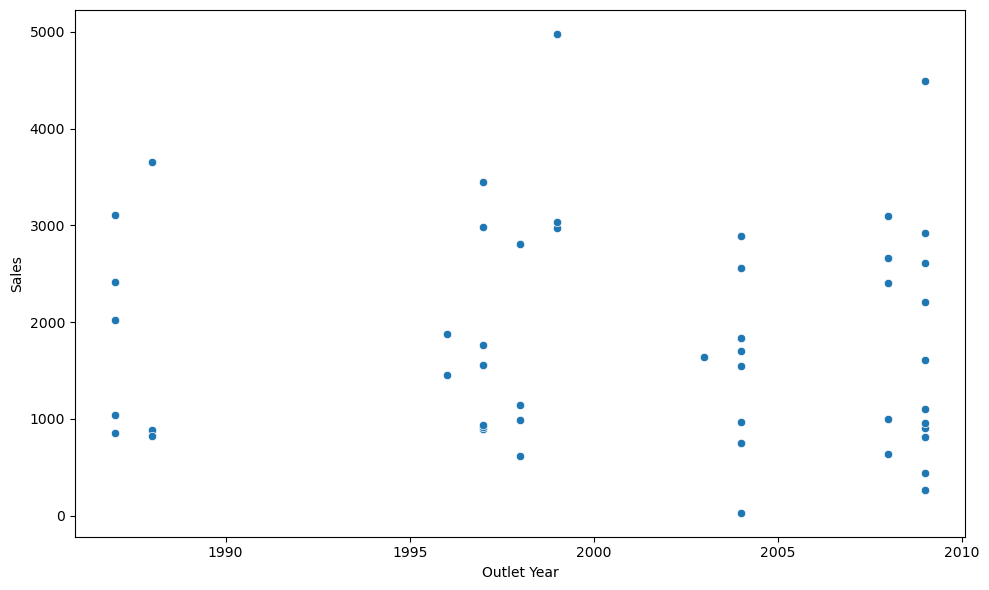

In [28]:
# create a basic scatterplot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = "Outlet_Year", y = "Sales")
plt.xlabel("Outlet Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

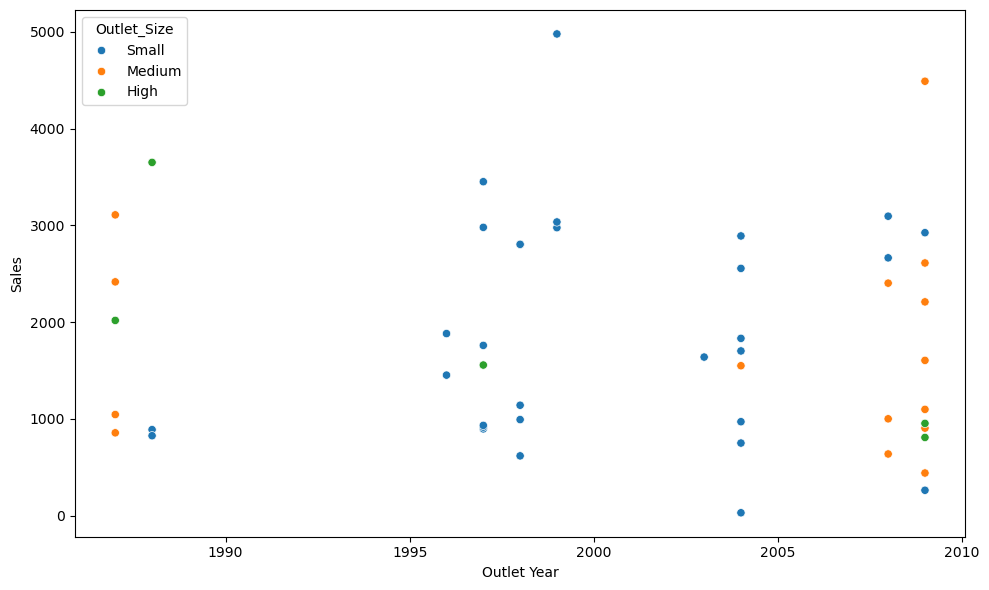

In [33]:
# create a basic scatterplot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = "Outlet_Year", y = "Sales", hue = "Outlet_Size")
plt.xlabel("Outlet Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

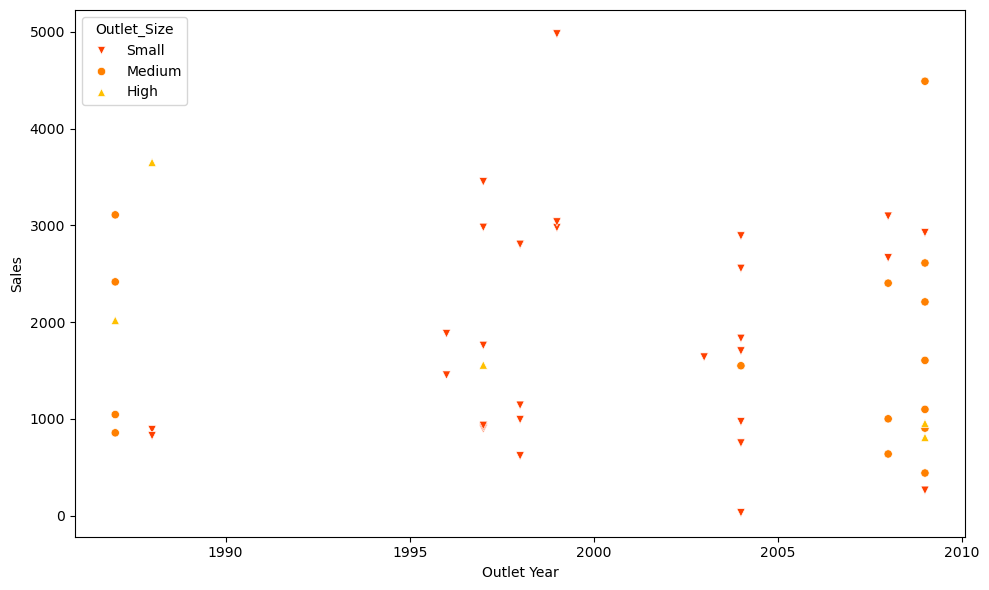

In [35]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = "Outlet_Year", y = "Sales", style = "Outlet_Size", 
                hue = "Outlet_Size",
                markers = {"Small":'v',"Medium":"o","High": '^'}
                ,palette="autumn")
plt.xlabel("Outlet Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

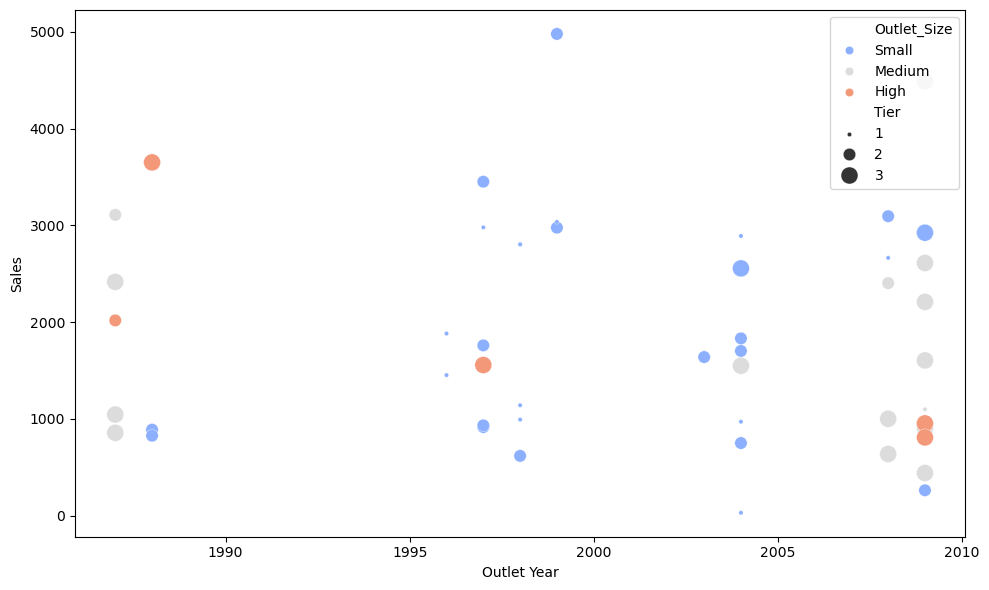

In [37]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, 
                x = "Outlet_Year", 
                y = "Sales", 
                size = "Tier",
                sizes = (10, 150),
                legend = "full", 
                hue = "Outlet_Size",
                markers = {"Small":'v',"Medium":"o","High": '^'}
                ,palette="coolwarm")
plt.xlabel("Outlet Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

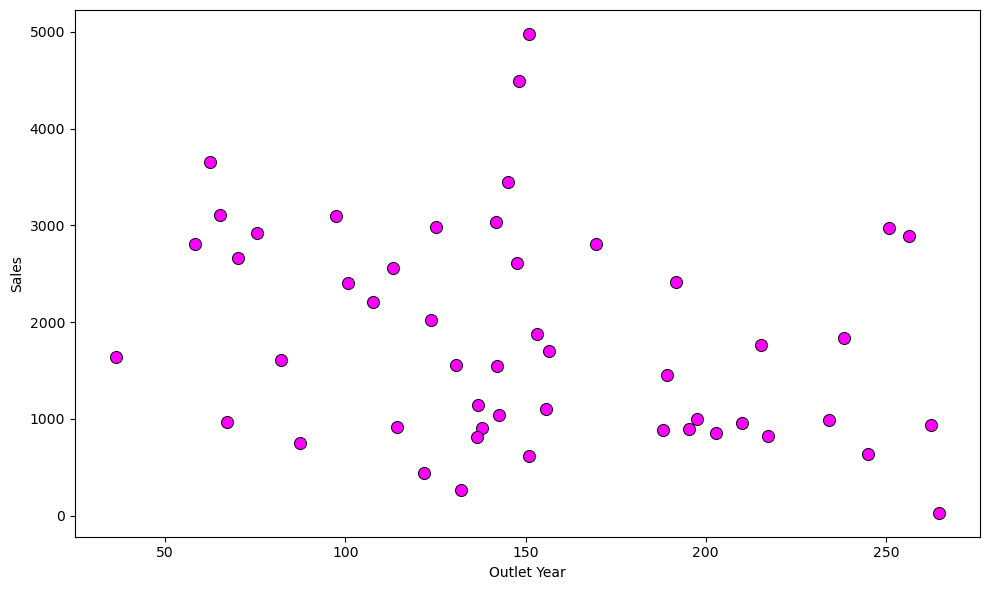

In [46]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, 
                x = "Item_MRP", 
                y = "Sales", 
                #size = "Tier",
                s = 75,
                #hue = "Outlet_Size",
                color="magenta",
                edgecolor = "black")
plt.xlabel("Outlet Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()